In [12]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
import itertools

In [13]:
def generate_Z(A):
    l = list(itertools.product([-1, 1], repeat=3))
    #print(l)
    x = np.array(l)
    z = A@x.T
    plt.plot(z[0,:], z[1,:], "o")

In [14]:
def oracle(X, A):
    l = list(itertools.product([-1, 1], repeat=3))
    L = np.array(l)
    Z = A@L.T
    X = X.reshape(2)
    x = lsq_linear(Z, X, bounds=(-1, 1), verbose = 0)
    return(x.cost == 0.0)

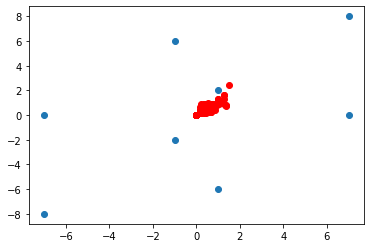

In [15]:
# Make a list/array for the final points
#tmpx - random n-stdgaussian, normalized, then scaled by delta(uniform point in the unit sphere)
X = np.array([0, 0]).reshape(2,1)
A = np.array([[0, 3, 4], [4, 3, 1]]);
generate_Z(A)
calls = 0
pos = X
out_pos = X
delta = .98
for j in range(1,1000):
    for i in range(1, 100):
        tmpx = X + np.random.uniform(0, delta, (2,1))
        if(oracle(tmpx, A)):
            calls = calls + 1
            X = tmpx
            pos = np.hstack((pos, X))
            #print(pos)
            plt.plot(pos[0, :], pos[1,:], 'ro')
        else:
            #print(tmpx)
            break;
    X = np.array([0, 0]).reshape(2,1)
    pos = X
    out_pos = X

plt.show()

In [31]:
print(calls)

65
